In [103]:
import lvpyio as lv
import numpy as np
import matplotlib.pyplot as plt
data_dir = '/Users/eigil/Desktop/particle_tracking_02456/data/raw/ImgPreproc(no_subtract)/'

n_frames = 100

In [138]:
def load_frame(frame_number, camera_number=0):
    buffer = lv.read_buffer(data_dir + f"B{str(frame_number+1).zfill(5)}.im7")
    image = buffer[camera_number].as_masked_array().data
    return image

def threshold_projection(image, a, b):
    return (np.clip(image, a, b) - a)/(b-a)

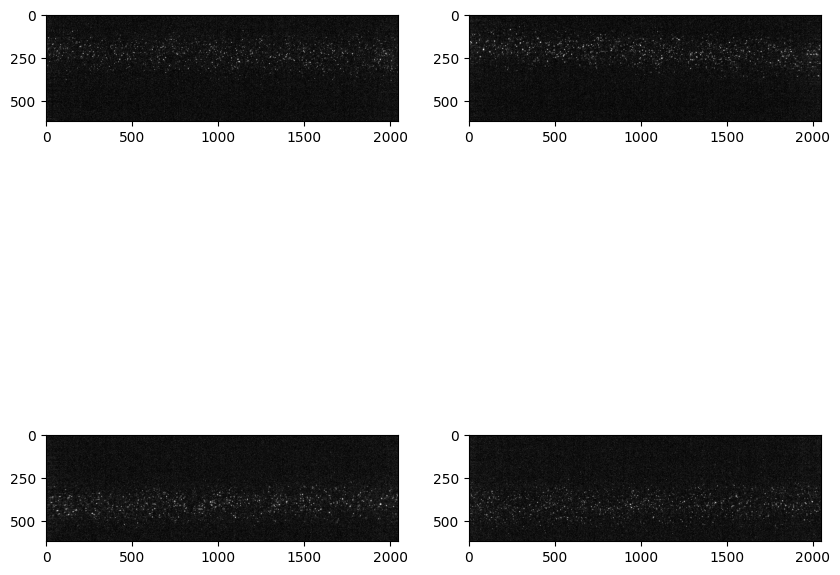

In [176]:
# Plot one frame for each of the 4 cameras
f = lambda img: threshold_projection(img, 0, 30)
fig, ax = plt.subplots(2,2, figsize=(10,10))
ax[0,0].imshow(f(load_frame(0,0)), cmap='gray')
ax[0,1].imshow(f(load_frame(0,1)), cmap='gray')
ax[1,0].imshow(f(load_frame(0,2)), cmap='gray')
ax[1,1].imshow(f(load_frame(0,3)), cmap='gray')
plt.show()

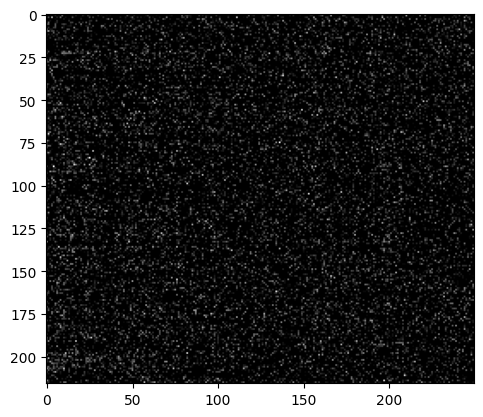

In [155]:
image = load_frame(0,0)
image = threshold_projection(image[400:, :250], 1, 30)
plt.imshow(image, cmap='gray')
plt.show()

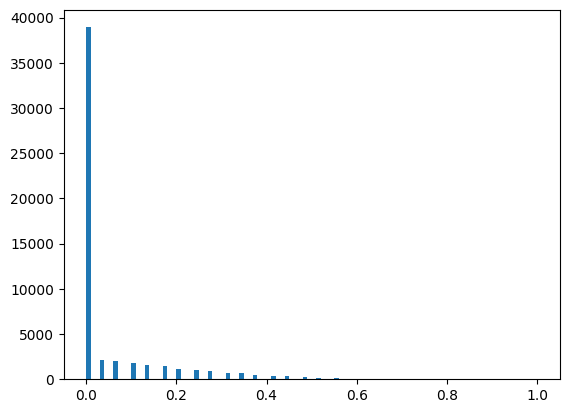

In [157]:
# Make intensity histogram
image = load_frame(0,0)
plt.hist(image.ravel(), bins=100)
plt.show()

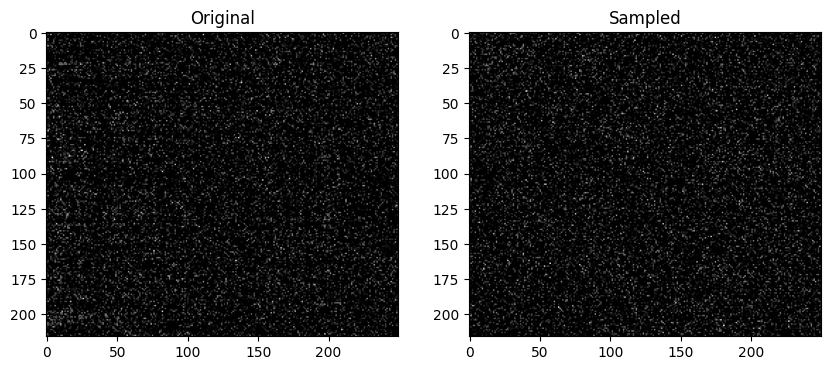

In [161]:
import numpy as np

class Distribution:
    def __init__(self, data):
        self.data = data
        self.values, self.probabilities = self.create_distribution()
    
    def create_distribution(self):
        unique_values = np.unique(self.data)
        unique_counts = np.array([np.count_nonzero(self.data == value) for value in unique_values])
        # Normalize the data to create a probability distribution
        probabilities = unique_counts / np.sum(unique_counts)
        return unique_values, probabilities
    
    def sample_distribution(self, num_samples):
        samples = np.random.choice(self.values, size=num_samples, p=self.probabilities)
        return samples

image = load_frame(0,0)[400:, :250]

# Your list of numbers
data = image.ravel()

# Create the distribution
distribution = Distribution(data)

samples = distribution.sample_distribution(len(data))

# reshape sample like data
samples = samples.reshape(image.shape)

samples = threshold_projection(samples, 1, 30)
image = threshold_projection(image, 1, 30)


# Plot two images side by side
fig, ax = plt.subplots(1,2, figsize=(10,10))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original')
ax[1].imshow(samples, cmap='gray')
ax[1].set_title('Sampled')
plt.show()


Text(0.5, 1.0, 'Sampled')

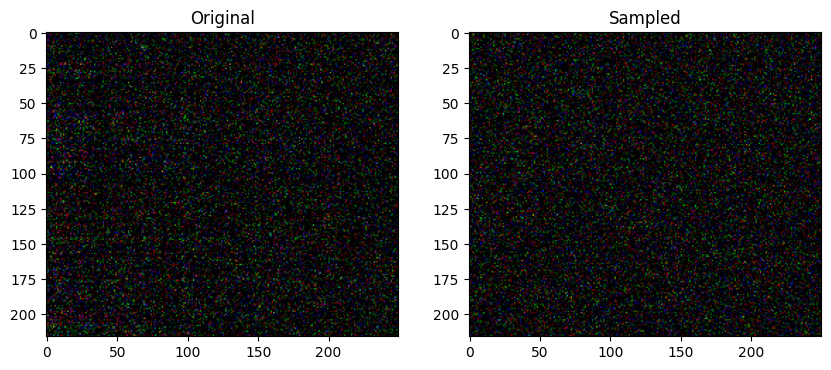

In [170]:
# Again with time/color
image1 = load_frame(0,0)[400:, :250]
image2 = load_frame(1,0)[400:, :250]
image3 = load_frame(2,0)[400:, :250]

image = np.stack([image1, image2, image3], axis=-1)

data = np.array(list(image1.ravel()) + list(image2.ravel()) + list(image3.ravel()))

# Create the distribution
distribution = Distribution(data)

samples = distribution.sample_distribution(len(data))

# reshape sample like data
samples = samples.reshape((image1.shape[0], image1.shape[1], 3))

samples = threshold_projection(samples, 1, 30)
image = threshold_projection(image, 1, 30)

# plot two images side by side
fig, ax = plt.subplots(1,2, figsize=(10,10))
ax[0].imshow(image)
ax[0].set_title('Original')
ax[1].imshow(samples)
ax[1].set_title('Sampled')

In [168]:
data.shape

(54000, 3)

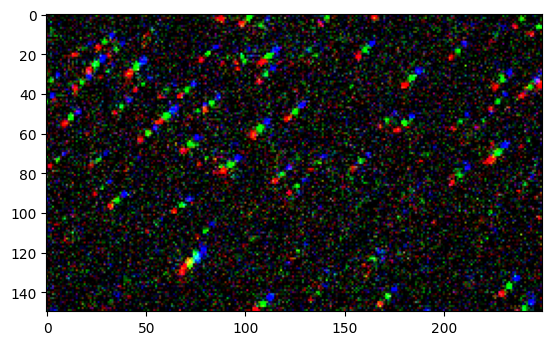

In [175]:
# Plot 3 sequential frames as an rgb image
camera_number = 3

image1 = f(load_frame(0,camera_number))[350:500,1000:1250]
image2 = f(load_frame(1,camera_number))[350:500,1000:1250]
image3 = f(load_frame(2,camera_number))[350:500,1000:1250]
image = np.stack([image1, image2, image3], axis=-1)
plt.imshow(image)
plt.show()

In [112]:
buffer.max()

806.0

In [83]:
#list all attributes and methods defined for the buffer object
print(dir(buffer))

['__annotations__', '__class__', '__dataclass_fields__', '__dataclass_params__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'as_masked_array', 'attributes', 'frames', 'plot']


In [100]:
buffer[3].as_masked_array().data.shape

(616, 2048)

In [ ]:
def load_lv_file(lv_file_path):
    buffer = lv.read_buffer(lv_file_path)
    buffer = np.array(buffer)
    return buffer

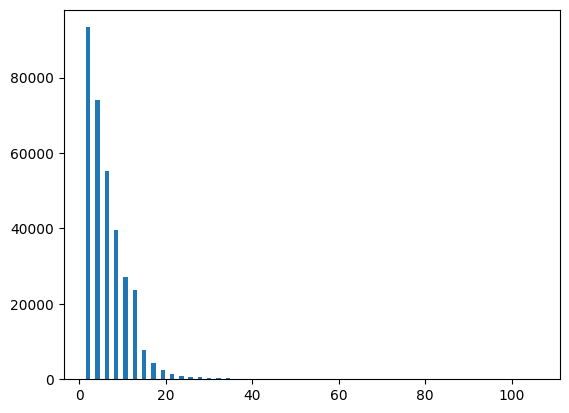

In [68]:
counts, bins = np.histogram(np.array(buffer[1,0]["PIXEL"]), bins=len(np.unique(buffer[1,0]["PIXEL"])))

# Plot the histogram
plt.bar(bins[1:50], counts[1:50], width=1)
plt.show()

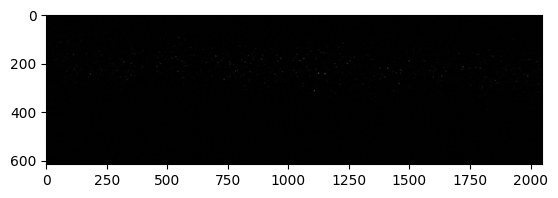

In [51]:
import matplotlib.pyplot as plt
plt.imshow(np.round(np.array(buffer)[1,0]["PIXEL"]/475*4059), cmap='gray')
plt.show()

In [59]:
len(np.unique(np.array(buffer)[1,0]["PIXEL"]))

221

In [60]:
bins

array([  0. ,  47.5,  95. , 142.5, 190. , 237.5, 285. , 332.5, 380. ,
       427.5, 475. ])

In [179]:
from pycine.raw import read_frames
file = read_frames(r'C:\Users\eigil\Desktop\particle_tracking_02456\data\raw\Camera1.cine')

In [185]:
next(file[0])

ValueError: operands could not be broadcast together with shapes (378471,) (378470,) 

In [198]:
def find_zero_sequence(file, sequence_length):
    count = 0
    while True:
        byte = file.read(1)
        if not byte:
            # End of file
            break
        if byte == b'\x00':
            # Increment the count of consecutive zeros
            count += 1
            if count == sequence_length:
                # Found a sequence of zeros of the required length
                print(f'Found a sequence of {sequence_length} zeros')
                return
        else:
            # Reset the count
            count = 0
    print('Did not find a sequence of zeros of the required length')
import os
import binascii

with open(r'C:\Users\eigil\Desktop\particle_tracking_02456\data\raw\Camera1.cine', 'rb') as f:
    #find_zero_sequence(f, 10000)
    f.seek(-100, os.SEEK_END)
    bytes = f.read(100)
    integers = [int.from_bytes(bytes[i:i+2], byteorder='big') for i in range(0, len(bytes), 2)]
    print(integers)
    print(bytes)
    print(binascii.hexlify(bytes))

[18692, 41033, 1168, 14340, 68, 944, 17157, 8254, 864, 16387, 61498, 928, 17412, 8254, 880, 15363, 61506, 1056, 16388, 24635, 944, 12803, 57408, 976, 12036, 20549, 992, 10756, 63, 1024, 19203, 61509, 1040, 16644, 53312, 1008, 15364, 8255, 1120, 11779, 36920, 1024, 15363, 53321, 960, 15364, 12355, 1024, 13060, 8252]
b'I\x04\xa0I\x04\x908\x04\x00D\x03\xb0C\x05 >\x03`@\x03\xf0:\x03\xa0D\x04 >\x03p<\x03\xf0B\x04 @\x04`;\x03\xb02\x03\xe0@\x03\xd0/\x04PE\x03\xe0*\x04\x00?\x04\x00K\x03\xf0E\x04\x10A\x04\xd0@\x03\xf0<\x04 ?\x04`.\x03\x908\x04\x00<\x03\xd0I\x03\xc0<\x040C\x04\x003\x04 <'
b'4904a04904903804004403b04305203e03604003f03a03a04404203e03703c03f04204204004603b03b03203e04003d02f04504503e02a04003f04004b03f04504104104d04003f03c04203f04602e03903804003c03d04903c03c04304304003304203c'


In [201]:
int('0490' ,16)

1168